# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Maximum Likelihood Estimation
Week 8 | Lesson 8.07

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Understand the MLE in the context of basic Bayesian analysis
- Conceptually explain the construction of some MLE of parameters for several distributions
- Review of the construction of the MLE with some basic calculus
---

Helpful for today: https://www.wolframalpha.com/

<a name="opening"></a>
## Opening - Review of Bayesian Statistics
Recall that our goal is to find the posterior distribution of some parameter(s). Suppose we have one unknown parameter, $\theta$, and some data. Then, the posterior distribution is given by:

$$f(\theta|\text{data}) = \frac{f(\text{data}|\theta)\times f(\theta)}{f(\text{data})}$$

Given that $f(\text{data})$ serves as the normalization constant, we sometimes ignore it and write:

$$f(\theta|\text{data}) \propto f(\text{data}|\theta)\times f(\theta)$$

or:

$$f(\theta|\text{data}) \propto \text{likelihood} \times \text{prior}$$

- Our prior should describe our beliefs about our unknown parameters *before* observing any data.

- Our likelihood is what connects our data to our unknown parameters. (Given different parameter values, what do we expect our data to look like?)

- Our posterior distribution combines our prior with our likelihood in order to develop a more informed understanding of our parameters than if we relied only on previous information or only on gathered data alone.

**Check:** What is the purpose of the normalization constant?

## Likelihood

Our goal today is to discuss a method called maximum likelihood estimation, but we'll get there.

### Derivatives

Before we introduce the topic of *maxima* and *minima*, we'll mention some resources to review basic derivatives.

- [Khan Academy lectures/notes on basic differentiation](https://www.khanacademy.org/math/differential-calculus/taking-derivatives)
- In particular, [check out the video for taking derivatives of the form f(x) = x^2](https://www.khanacademy.org/math/differential-calculus/taking-derivatives/derivative-intro/v/calculus-derivatives-2-5-new-hd-version).

This will be the extent of calculus you'll need to know to understand MLEs under the hood! But we also highly recommend that you check out [this simple page from Brown University's math department](http://www.math.brown.edu/UTRA/derivrules.html). This will go over the basic rules of **differentiation of one variable**.

<a name="introduction"></a>
### Applying the Derivative

Calculating the *global maxima* (or minima) is a fairly simple procedure; however, it will require a little bit of the calculus that we referenced above.

Suppose we're working with a coin, but we don't know that it's a fair coin. We'll say that it flips heads $p\%$ of the time and tails $(1-p)\%$ of the time. Our goal is to identify the "best" value of $p$.

There is a method of identifying the best value of $p$ called **maximum likelihood estimation**. We find the value of $p$ with the maximum likelihood value. (This is similar to what we did yesterday with the Dungeons & Dragons dice example and the bowls of cookies example.) However, rather than checking every possible die or every possible bowl, we have infinitely many values that $p$ could take on... so how do we do this?

(Stick with me here.) Let's flip our coin $n$ times. The first flip will be $X_1$, the second flip will be $X_2$, and so on through $X_n$. We'll say that $X_i = 1$ if we flip heads and $X_i = 0$ if we flip tails.

Remember that the likelihood is $f(\text{data}|p)$. If we make pretty basic assumptions about how $X_1$,$\ldots$,$X_n$ behave, then we can find an actual function for $f(\text{data}|p)$. I'll go through this particular function in a second.

Let's say we wanted to find the *maximum value* of this function, what would that mean?

1. The function would hopefully "peak" at some point; therefore, in some way, the function would have to look somewhat like a inverted parabola.
2. This peak would have to be a 'global' peak, i.e. it can have multiple peaks, but only one can be the 'largest.'
3. Once we find the peak, the value/level of the peak is not what we're actually interested in (the height of the function). What we're actually interested in is to guess which value of $p$ needs to be our input to reach that maximum height.

For kicks, we'll also add the condition that the function has to be continuous and differentiable, henceforth referred to as **nice** functions.

```python
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0,1,100)   # We want to ensure we have enough "granularity" in the graph so we set hash marks to 100
y = x**5*(1-x)**4  # Mapping the Bernoulli scheme
plt.plot(x,y)

#Uncomment this next line after working through the work below.
#plt.axvline(x=.55556,color='k',ls='dashed')

plt.show()
```

Perfecto! We have a nice plot that satisfies the above requirements. We can eyeball the peak of this upside down parabola, but that's not really 'scientific', and we are after all, aspiring data scientists, so we seek precision!

In the context of the plot we just made, how can we characterize the peak? The easiest way is to note that it's a point of 'inflection' on the graph that is before the peak, the slope of the graph is positive and so after the peak, the slope of the graph is negative. This is great, because whenever we start talking about slopes for **nice** functions we can bring in our friend, *calculus*.

In particular, if the slope of the graph is positive at one side of the graph, and negative on the other, it must at some point be 0. This is a condition (but not always sufficient) we need to have to find the peak.

$$\frac{d}{dp} p^5(1-p)^4 = 0$$

This is a product, and hence, we utilize the product rule to analytically solve the derivative to get the following:

$$5p^4(1-p)^4 - 4(1-p)^3p^5 = 0$$

We now "balance" the equation by taking the conveniently negative part of the left-hand side to the right-hand side and get the following:

$$ 5p^4(1-p)^4 = 4(1-p)^3p^5 $$

Do some algebra, and we get the following:

$$p = .55556$$

Did it work? Uncomment out the plt.axvline in the code above and see!

So you've learned a new trick. Great! Now you can go forth and solve all global maxima problems right?

Well... we did it for a Bernoulli scheme, but in general, if we wanted to compute the likelihood function as part of a posterior, we would need take the joint Bernoulli distribution, which (assuming independent identically distributed), would look something like this:

$$L(X_1,\ldots,X_n|\theta) = \prod_{i=1}^n f(x_i|\theta)$$

Depending on how much data we have, we might have a lot of products here.

**Check:** In machine learning and statistics, why might we be wary when we're multiplying many things? How might we get around this?

### General Bernoulli Case
Suppose we're flipping that unfair coin and we want to find the maximum likelihood estimator given $n$ coin flips, assuming each coin flip is an independent Bernoulli trial.

### Properties of MLEs.

The maximum likelihood estimator is incredible in that the MLE is often a really intuitive estimator (as we came up with above). However, there are additional properties that can be quite convenient.

- MLEs are "consistent."
 - As $n\rightarrow\infty$, our estimator $\hat{\theta}\rightarrow\theta$.
- MLEs are "asymptotically Normal."
 - As $n\rightarrow\infty$, our estimator $\hat{\theta}\sim N(\theta,I(\theta))$, where $I(\theta)$ is something called the "Fisher information".
- MLEs are "efficient."
 - Among all consistent estimators of $\theta$, the MLE has the smallest variance. (BLUE!)
- MLEs are invariant to transformations.
 - If $\hat{\theta}$ is the MLE of $\theta$, then $g(\hat{\theta})$ is the MLE of $g(\theta)$.

### Plotting the prior, likelihood and posterior

So you may start to wonder, "I get that MLE applies to the likelihood function, but hey -- isn’t Bayesian analysis more than just the likelihood function? Aren't we supposed to be taking into account prior data, if we were good Bayesians?"

The answer to both questions are: yes!

For several reasons, MLE is not always the best procedure for Bayesian inference.

One obvious issue is overfitting numerically to just the functional form of the likelihood, and not taking into account any prior data. Of course, to take into account the prior, you will have to do a similar optimization scheme on the whole posterior, as opposed to individual components of the posterior (i.e. likelihood).

This second optimization is called appropriately enough: Maximum A-Posteriori Estimation (MAP)

Want resources on MAP? Check out [the following resource](https://www.probabilitycourse.com/chapter9/9_1_2_MAP_estimation.php) and [video](https://www.youtube.com/watch?v=kkhdIriddSI) for MAP.

Now let's demonstrate when MLE = MAP visually!

Instructions: Do this in small groups. Use Numpy to visualize the Bernoulli scheme on an X-Y grid. Show how a prior distribution can affect the posterior (or the product of the two).

```python
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(0,1.,.01)   # We want to ensure we have enough "granularity" in the graph so we set hash marks to 100
likelihood = (x**5)*(1-x)**4  # Mapping the Bernoulli scheme

# Alter the prior and see how that visually alters the posterior

prior = (x)**0.40*(1-x)**0.60
z = likelihood * prior

#plt.plot(x,prior)
plt.plot(x, likelihood, 'r', x, z, 'g--')
plt.axvline(x=.55556,color='k',ls='dashed')

plt.show()

```

***

### ADDITIONAL RESOURCES

- For those who want a challenge, and are curious/fascinated by this topic, [this is an EXCELLENT reading on the history (historical/analytic development) of the MLE](https://arxiv.org/pdf/0804.2996.pdf)

- A fairly ["calculus-light" slide deck summarizing MLE](http://spia.uga.edu/faculty_pages/monogan/teaching/ts/B2mle.pdf)

- This will provide alternative proofs / commentary on MLE for various distributions. It's probably also good for your background if you are [up for a really deep-dive challenge](https://onlinecourses.science.psu.edu/stat504/node/28)

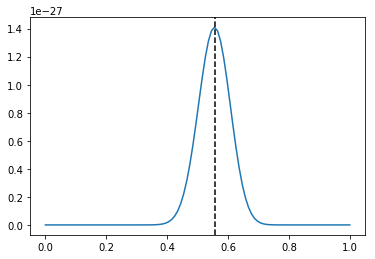

In [3]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0,1,100)   # We want to ensure we have enough "granularity" in the graph so we set hash marks to 100
y = x**50*(1-x)**40  # Mapping the Bernoulli scheme
plt.plot(x,y)

#Uncomment this next line after working through the work below.
plt.axvline(x=.55556,color='k',ls='dashed')

plt.show()

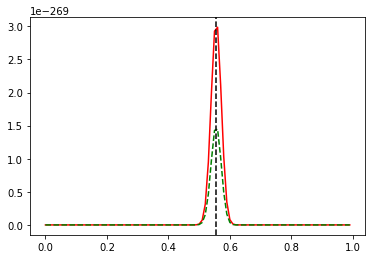

In [5]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(0,1.,.01)   # We want to ensure we have enough "granularity" in the graph so we set hash marks to 100
likelihood = (x**500)*(1-x)**400  # Mapping the Bernoulli scheme

# Alter the prior and see how that visually alters the posterior

prior = (x)**0.40*(1-x)**0.60
z = likelihood * prior

#plt.plot(x,prior)
plt.plot(x, likelihood, 'r', x, z, 'g--')
plt.axvline(x=.55556,color='k',ls='dashed')

plt.show()